# Data Cleaning <br>

Focus on:<br>
1. Columns that only have a single value (zero-variance predictors).<br>
2. Columns with very few unique values (near-zero variance predictors).<br>
3. Rows that contain duplicate observations.<br>

In [1]:
# import basic libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('oil-spill.txt', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,214.7,0.21,0.26,0.49,0.10,0.40,99.59,32.19,1.84,0.16,0.20,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.20,-3.71,-0.18,2.19,0.0,2.19,310,16110,0.00,138.68,89,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.30,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,0.0,0.00,704,40140,0.00,68.65,89,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,86.1,0.21,0.32,0.50,0.17,0.34,71.20,16.73,1.82,0.19,0.29,87.65,0,0.46,132.78,-0.01,3.78,0.70,4.79,-3.36,-0.23,1.95,0.0,1.95,29,1530,0.01,38.80,89,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,166.5,0.21,0.26,0.48,0.10,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.20,0.0,2.20,183,10080,0.00,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0.0,2.19,45,2340,0.00,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,110.0,0.23,0.26,0.34,0.19,0.15,23.89,17.00,0.40,0.23,0.26,55.85,0,1.06,221.97,0.87,5.07,0.95,3.03,-1.25,-0.53,1.10,0.0,1.10,8,540,0.01,8.04,82,50,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,107.2,0.18,0.20,0.25,0.16,0.09,37.36,26.33,0.40,0.18,0.20,55.85,0,1.07,221.97,0.87,5.07,1.19,3.39,-1.70,-0.64,1.23,0.0,1.23,9,630,0.01,7.75,82,50,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,133.9,0.28,0.26,0.30,0.21,0.09,12.91,15.23,0.40,0.28,0.26,55.85,0,1.08,221.97,0.87,5.07,1.60,5.08,-0.90,-0.55,1.09,0.0,1.09,7,450,0.00,6.33,82,50,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,97.5,0.23,0.24,0.26,0.23,0.03,20.41,18.11,0.40,0.23,0.24,55.85,0,1.07,221.97,0.87,5.07,0.99,2.94,-1.31,-0.36,1.09,0.0,1.09,7,540,0.01,8.53,82,50,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [4]:
# # summarize the number of unique values in each column - old way
# for i in range(df.shape[1]):
#     print(i, len(unique(df.loc[:,i])))

In [5]:
# summarize the number of unique values in each column
counts = df.nunique()
counts

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

# Ad.1. Zero-variance predictors

In [6]:
# Current state:
print(f'Current state: {df.shape}')

Current state: (937, 50)


In [7]:
# record columns to delete (where all rows have the same value)
to_del = [i for i,v in enumerate(counts) if v == 1]
to_del

[22]

In [8]:
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(f'After dropping: {df.shape}')

After dropping: (937, 49)


# Ad.2. Near-zero-variance predictors

In [9]:
# percentage of unique values in each column
percentage = df.nunique() / df.shape[0] * 100
percentage

0      25.400213
1      31.696905
2      98.932764
3      99.573106
4      19.103522
5      40.021345
6      87.513340
7      65.955176
8      59.871932
9       6.083244
10     61.579509
11      6.296692
12      7.790822
13     11.419424
14      5.656350
15      9.711846
16     95.304162
17     86.446105
18     18.143010
19      5.656350
20      7.257204
21      0.960512
23      9.818570
24      0.960512
25      0.853789
26      0.960512
27     32.870864
28     47.705443
29     41.835646
30     11.419424
31      4.482391
32      0.426894
33      4.802561
34     15.048026
35     11.739594
36      0.320171
37     80.896478
38      0.960512
39      0.960512
40     41.408751
41     23.479189
42     68.729989
43     69.263607
44     53.255069
45      0.213447
46    100.000000
47     18.036286
48     30.522946
49      0.213447
dtype: float64

In [10]:
percentage[percentage < 1]

21    0.960512
24    0.960512
25    0.853789
26    0.960512
32    0.426894
36    0.320171
38    0.960512
39    0.960512
45    0.213447
49    0.213447
dtype: float64

This does not mean that these rows and columns should be deleted, but they require further attention.<br><br>

For example:<br>

Perhaps the unique values can be encoded as ordinal values? <br>
Perhaps the unique values can be encoded as categorical values? <br>
Perhaps compare model skill with each variable removed from the dataset? <br>

Variance is a statistic calculated on a variable as the average squared difference of values on the sample from the mean:

In [11]:
from sklearn.feature_selection import VarianceThreshold

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

# apply transform with each threshold
results = list()
for t in thresholds:
    
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    
    # determine the number of input features
    n_features = X_sel.shape[1]
    print(f'Threshold={t:.2f}, Features={n_features}')
    
    # store the result
    results.append(n_features)

Threshold=0.00, Features=48
Threshold=0.05, Features=37
Threshold=0.10, Features=36
Threshold=0.15, Features=35
Threshold=0.20, Features=35
Threshold=0.25, Features=35
Threshold=0.30, Features=35
Threshold=0.35, Features=35
Threshold=0.40, Features=35
Threshold=0.45, Features=33
Threshold=0.50, Features=31


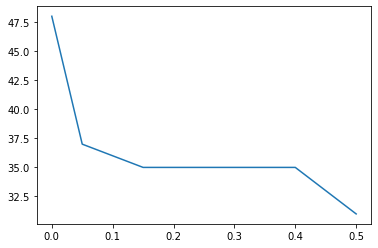

In [13]:
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

We can see that even with a small threshold between 0.15 and 0.4, that a large number of features (14) are removed immediately.

In [14]:
# decide the threshold
t = 0.15

# define the transform
transform = VarianceThreshold(threshold=t)
# transform the input data
X_sel = transform.fit_transform(X)
    
# determine the number of input features
n_features = X_sel.shape[1]
print(f'Threshold={t:.2f}, Features={n_features}')

Threshold=0.15, Features=35


In [15]:
print(X_sel.shape)

(937, 35)


In [16]:
# resulting selected columns (columns names need to be renamed)
X_sel = pd.DataFrame(X_sel)
X_sel

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1.0,2558.0,1506.09,456.63,90.0,6395000.0,40.88,7.89,29780.0,214.7,99.59,32.19,1.84,87.65,132.78,-0.01,3.78,0.22,3.20,-3.71,2.19,2.19,310.0,16110.0,138.68,89.0,69.0,2850.00,1000.00,763.16,135.46,3.73,33243.19,65.74,7.95
1,2.0,22325.0,79.11,841.03,180.0,55812500.0,51.11,1.21,61900.0,901.7,6058.23,4061.15,2.30,87.65,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,704.0,40140.0,68.65,89.0,69.0,5750.00,11500.00,9593.48,1648.80,0.60,51572.04,65.73,6.26
2,3.0,115.0,1449.85,608.43,88.0,287500.0,40.42,7.34,3340.0,86.1,71.20,16.73,1.82,87.65,132.78,-0.01,3.78,0.70,4.79,-3.36,1.95,1.95,29.0,1530.0,38.80,89.0,69.0,1400.00,250.00,150.00,45.13,9.33,31692.84,65.81,7.84
3,4.0,1201.0,1562.53,295.65,66.0,3002500.0,42.40,7.97,18030.0,166.5,120.22,33.47,1.91,87.65,132.78,-0.01,3.78,0.84,6.78,-3.54,2.20,2.20,183.0,10080.0,108.27,89.0,69.0,6041.52,761.58,453.21,144.97,13.33,37696.21,65.67,8.07
4,5.0,312.0,950.27,440.86,37.0,780000.0,41.43,7.03,3350.0,232.8,289.19,48.68,1.86,87.65,132.78,-0.01,3.78,0.02,2.28,-3.44,2.19,2.19,45.0,2340.0,14.39,89.0,69.0,1320.04,710.63,512.54,109.16,2.58,29038.17,65.66,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200.0,12.0,92.42,364.42,135.0,97200.0,59.42,10.34,884.0,110.0,23.89,17.00,0.40,55.85,221.97,0.87,5.07,0.95,3.03,-1.25,1.10,1.10,8.0,540.0,8.04,82.0,50.0,381.84,254.56,84.85,146.97,4.50,2593.50,65.85,6.39
933,201.0,11.0,98.82,248.64,159.0,89100.0,59.64,10.18,831.0,107.2,37.36,26.33,0.40,55.85,221.97,0.87,5.07,1.19,3.39,-1.70,1.23,1.23,9.0,630.0,7.75,82.0,50.0,284.60,180.00,150.00,51.96,1.90,4361.25,65.70,6.53
934,202.0,14.0,25.14,428.86,24.0,113400.0,60.14,17.94,847.0,133.9,12.91,15.23,0.40,55.85,221.97,0.87,5.07,1.60,5.08,-0.90,1.09,1.09,7.0,450.0,6.33,82.0,50.0,402.49,180.00,180.00,0.00,2.24,2153.05,65.91,6.12
935,203.0,10.0,96.00,451.30,68.0,81000.0,59.90,15.01,831.0,97.5,20.41,18.11,0.40,55.85,221.97,0.87,5.07,0.99,2.94,-1.31,1.09,1.09,7.0,540.0,8.53,82.0,50.0,402.49,180.00,90.00,73.48,4.47,2421.43,65.97,6.32


# Ad. 3. Rows That Contain Duplicate Data

Rows that have identical data are probably useless, if not dangerously misleading during model evaluation.

Here, a duplicate row is a row where each value in each column for that row appears in identically the same order (same column values) in another row

In [17]:
# calculate duplicates
dups = df.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
932    False
933    False
934    False
935    False
936    False
Length: 937, dtype: bool

In [18]:
df.duplicated().value_counts()

False    937
dtype: int64

In [19]:
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Index: []


In [20]:
# delete duplicate rows
df.drop_duplicates(inplace=True)

In [21]:
# in this case there were no duplicates so we have the same nr. of rows
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,214.7,0.21,0.26,0.49,0.10,0.40,99.59,32.19,1.84,0.16,0.20,87.65,0.47,132.78,-0.01,3.78,0.22,3.20,-3.71,-0.18,2.19,0.0,2.19,310,16110,0.00,138.68,89,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.30,0.02,0.02,87.65,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,0.0,0.00,704,40140,0.00,68.65,89,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,86.1,0.21,0.32,0.50,0.17,0.34,71.20,16.73,1.82,0.19,0.29,87.65,0.46,132.78,-0.01,3.78,0.70,4.79,-3.36,-0.23,1.95,0.0,1.95,29,1530,0.01,38.80,89,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,166.5,0.21,0.26,0.48,0.10,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.20,0.0,2.20,183,10080,0.00,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0.0,2.19,45,2340,0.00,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,110.0,0.23,0.26,0.34,0.19,0.15,23.89,17.00,0.40,0.23,0.26,55.85,1.06,221.97,0.87,5.07,0.95,3.03,-1.25,-0.53,1.10,0.0,1.10,8,540,0.01,8.04,82,50,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,107.2,0.18,0.20,0.25,0.16,0.09,37.36,26.33,0.40,0.18,0.20,55.85,1.07,221.97,0.87,5.07,1.19,3.39,-1.70,-0.64,1.23,0.0,1.23,9,630,0.01,7.75,82,50,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,133.9,0.28,0.26,0.30,0.21,0.09,12.91,15.23,0.40,0.28,0.26,55.85,1.08,221.97,0.87,5.07,1.60,5.08,-0.90,-0.55,1.09,0.0,1.09,7,450,0.00,6.33,82,50,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,97.5,0.23,0.24,0.26,0.23,0.03,20.41,18.11,0.40,0.23,0.24,55.85,1.07,221.97,0.87,5.07,0.99,2.94,-1.31,-0.36,1.09,0.0,1.09,7,540,0.01,8.53,82,50,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0
